In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nib
from glob import glob
#my関数
import myctvis
%matplotlib inline

## データのpathをDataFremeにする

In [2]:
df = myctvis.get_df_all()

## NifTIデータをNumpy Arrayとしてロードする

In [3]:
sample_path = df["FilePathImage"].iloc[0]
data = myctvis.load_nifti(sample_path)
#メモリきついためデータ削減
#data = data[:,:,:20]

## マスクデータをRGBにする

In [4]:
p = df["FilePathMask"][0]
seg_data = myctvis.load_nifti(p)
#メモリきついためデータ削減
#seg_data = seg_data[:,:,:20]
mask_color = myctvis.label_color(seg_data)


## CTデータをhuからグレイスケールに変換する

In [5]:
gray_volume = myctvis.hu_to_gray(data)

## CT画像とアノテーションのoverlay

In [6]:
overlayed = myctvis.overlay(gray_volume,seg_data,mask_color,0.7)

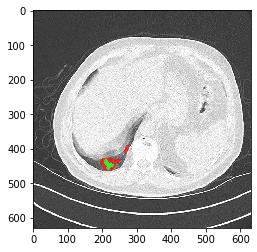

In [7]:
plt.imshow(overlayed[:,:,10])

## スライスを一覧で表示する

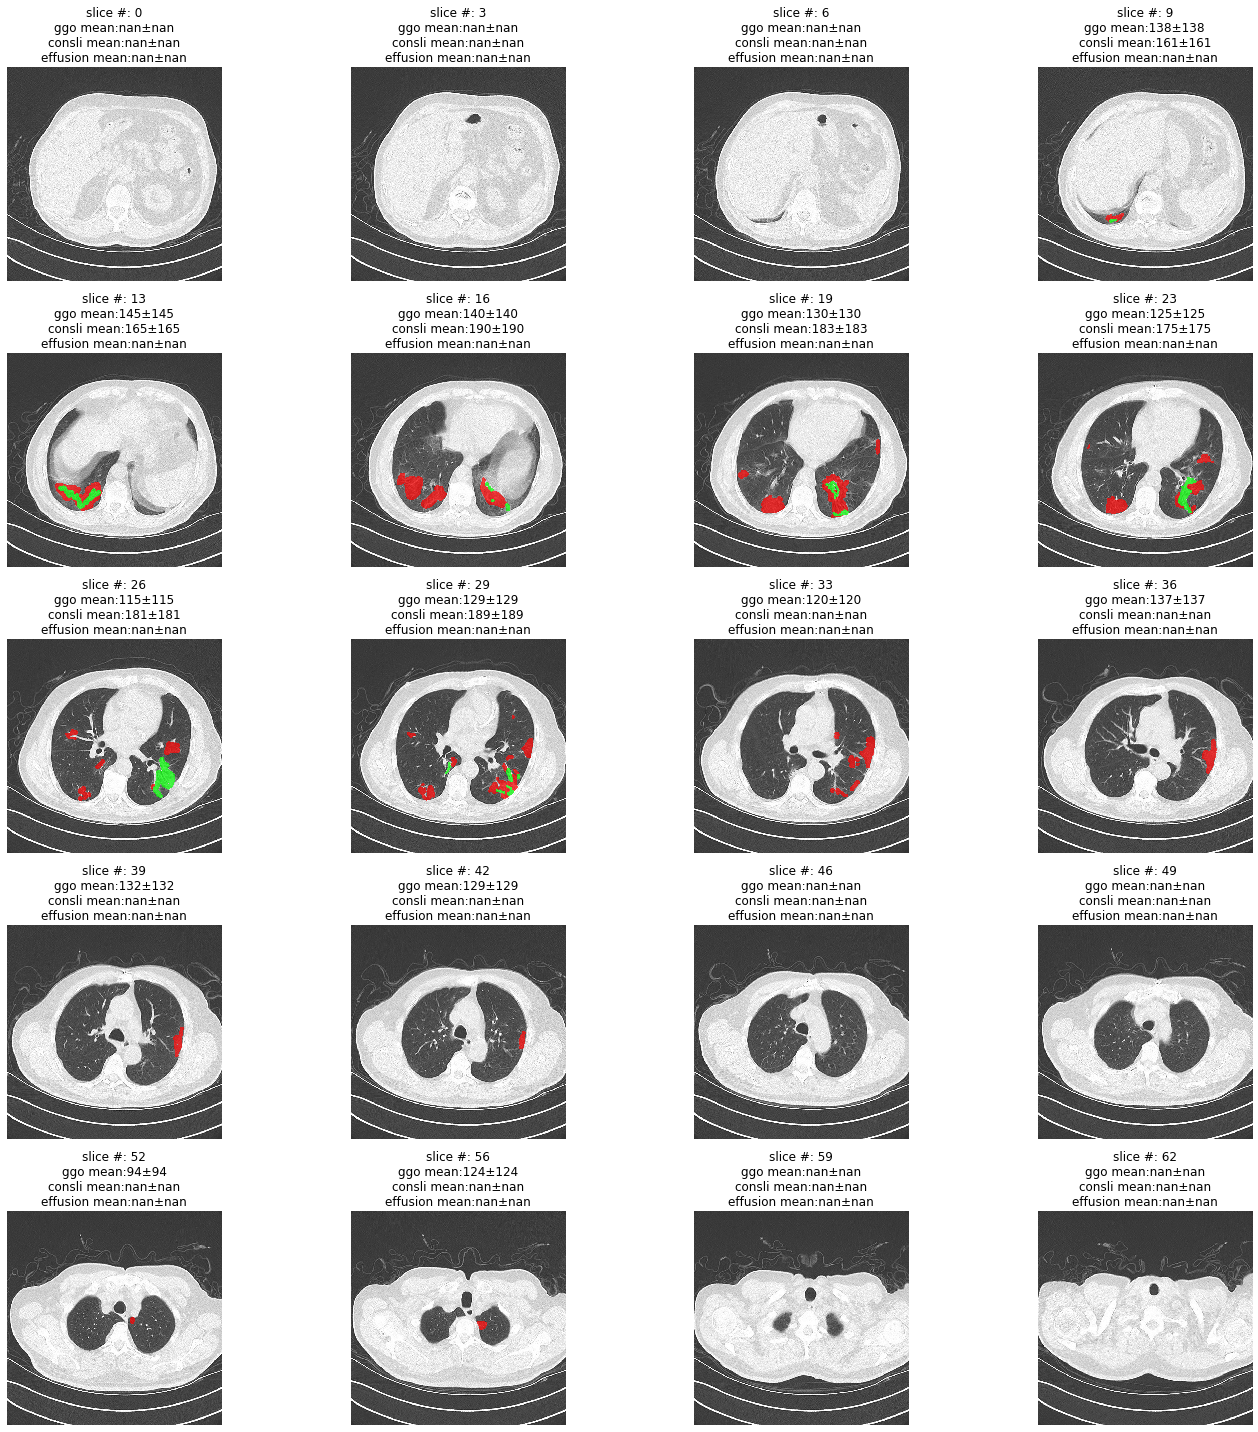

In [44]:
myctvis.vis_overlay(overlayed,gray_volume,seg_data)

In [41]:
overlayed[:,:,13]

array([[[52, 52, 52],
        [50, 50, 50],
        [49, 49, 49],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [53, 53, 53]],

       [[53, 53, 53],
        [51, 51, 51],
        [50, 50, 50],
        ...,
        [49, 49, 49],
        [51, 51, 51],
        [52, 52, 52]],

       [[53, 53, 53],
        [52, 52, 52],
        [51, 51, 51],
        ...,
        [50, 50, 50],
        [51, 51, 51],
        [52, 52, 52]],

       ...,

       [[50, 50, 50],
        [51, 51, 51],
        [52, 52, 52],
        ...,
        [50, 50, 50],
        [52, 52, 52],
        [52, 52, 52]],

       [[50, 50, 50],
        [51, 51, 51],
        [52, 52, 52],
        ...,
        [50, 50, 50],
        [52, 52, 52],
        [53, 53, 53]],

       [[50, 50, 50],
        [52, 52, 52],
        [53, 53, 53],
        ...,
        [50, 50, 50],
        [52, 52, 52],
        [53, 53, 53]]], dtype=uint8)

In [31]:
def get_hu_stats(volume,mask_volume,
                label_dict={1: "ggo",2: "consolidation", 3: "effusion"}):
    result = {}
    
    for label in label_dict.keys():
        prefix = label_dict[label]
        roi_hu = volume[np.equal(mask_volume, label)]
        result[prefix + "_mean"] = np.mean(roi_hu)
        result[prefix + "_std"] = np.mean(roi_hu)
    return result

In [32]:
get_hu_stats(gray_volume,seg_data)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'ggo_mean': 131.71050033016095,
 'ggo_std': 131.71050033016095,
 'consolidation_mean': 173.51078491648735,
 'consolidation_std': 173.51078491648735,
 'effusion_mean': nan,
 'effusion_std': nan}